# Model Selection and Hyperparameter Tuning
[COMP20121 Machine Learning for Data Analytics](https://sites.google.com/site/hejunhomepage/Teaching/machine-learning-for-data-analytics)

Author: Jun He

A machine learning model usually contains parameters. Some deep learning models even have over hundred parameters. Model selection is to select the best model with the best hyperparameters. This can be done manually or automatically. This lecture covers model evaluation and hyperparameter tuning.

* Explain concepts of model selection, overfitting, hyperparameter tuning
* Introduce two methods used in model selection:  holdout method and k-fold cross-validation
* Present several examples of manual and automatic tuning of hyperparameters

## Learning objectives
* What is model selection?
* What is holdout method? 
* What is k-fold cross-validation?
* How to tune hyperparameter manually or automatically?

In [ ]:
#import Python libraries used in this lecture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
import sklearn.model_selection as model_selection
from sklearn import tree
from sklearn import metrics

## Part 1 Model Selection and Overfitting
### What is Model Selection?
*  Model selection: how to select the final model from potential candidate models based on their performance on the training dataset
    * select a model from different types of models, e.g. from three classifiers: logistic regression, decision tree and KNN
    * select a model from the same model with different model hyperparameters, e.g., from the decision tree model with different tree depths
* Model evaluation: how to evaluate the performance of a candidate models using certain metrics, e.g., accuracy  

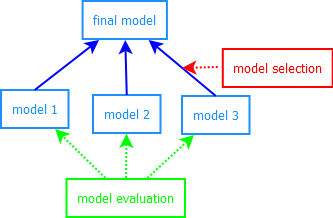

### Considerations in Model Selection 
* In a business project, model selection is not only a technical problem
* There are many considerations such as 
    * business requirements 
    * cost 
    * performance
    * state-of-the-art
    * maintenance
* It is difficult or impossible to find the best model meeting all criteria. Usually, turn to find a satisfactory model
* The best model in terms of technical performance may not be the best in business
    * [Netflix prize](https://www.kaggle.com/netflix-inc/netflix-prize-data) In 2009, 'Netflix held the Netflix Prize open competition for the best algorithm to predict user ratings for films. The grand prize was \$1,000,000 and was won by BellKor's Pragmatic Chaos team. This is the dataset that was used in that competition'. But this algorithm was never used by Netflix

### Parameter and Hyperparameter 
* A machine learning model always has a few parameters. Some deep learning models even have over hundred parameters
* Parameters of a model can be classified into two types:
    1. **parameter**: internal coefficients or weights for a model 
        * e.g., Logistic regression: coefficients ($\beta_0, \cdots, \beta_n$) 
        $$ \pi(x) = \frac{e^{\beta_0 +\beta_1 x_1+ \cdots + \beta_n x_n}}{1+e^{\beta_0 +\beta_1 x+\cdots+\beta_n x_n}}$$
        * learned in model fitting
        * fitting is to find optimal internal model parameters  

    2. **hyperparameter**: specified by practitioner when configuring the model
        * e.g. decision tree: depth of a tree 
        * tuned by practitioner 
* Tuning hyper-parameters may significantly improve the performance of a machine learning model 
* Manual tuning:  use the accuracy curve or other curves to select a best hyper-parameter
* Automatic tuning: a more powerful hyper-parameter tuning technique through search

### Dataset for Tuning Hyperparameter
* On the test dataset
    * Test dataset is regarded as new data to a model
    * A model cannot see class labels of test data. In Kaggle competitions, class labels of test data are set unseen to participants 
    * Thus, it is impossible to tune parameters on the test dataset
    * In other words, hyperparameter tuning in our previous labs is wrong
* On the training dataset
    * A hyperparameter must be tuned on training data set
    * However, this is bad practice because it leads to overfitting

### Overfitting and Underfitting
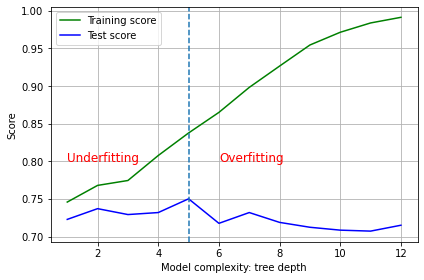

* Overfitting 
    * a model performs very well on the training data
    * but not on the test data
    * e.g. overfit when the tree depth = 10
* Underfitting  
    * a model fits the training data not well
    * and does not the fit test data very well 
    * e.g. underfit when the tree depth = 1

### Example 1: Overfitting (Simple Tree)
* Dataset: Diabetes dataset, available at https://www.kaggle.com/uciml/pima-indians-diabetes-database.
* Classifier: decision tree
* We compare the accuracy of the decision tree with different tree depth on both training and test data
* First, we look at max_depth = 4
    1. create a tree with max_depth = 4
    2. calculate the accuracy of the model on both training and test data
        * accuracy = 0.80 on training data
        * accuracy = 0.79 on test data
    3. plot the tree

In [ ]:
df2 = pd.read_csv("../input/diabetescsv/diabetes.csv") # read data
X = df2.iloc[:,0:8] #predictors. stop is excluded
y = df2.iloc[:,8] #target
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) # 20% for test data

clf_11 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf_11 = clf_11.fit(X_train,y_train)
y_pred = clf_11.predict(X_train) #accuracy on training data
print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred))
y_pred = clf_11.predict(X_test)  #accuracy on  test data
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(24,25)) # plot tree
_ = tree.plot_tree(clf_11, feature_names=df2.columns, class_names =['0','1'], filled=True)

### Example 1: Overfitting (Complex Tree)
* Secondly, we look at max_depth =15 
    1. create a tree with max_depth = 15
    2.  Check the accuracy of the model on training and test data
        * accuracy = 1 on training data
        * accuracy = 0.71 on test data, worse than the tree with max_depth =4
    3.  Plot the tree
        * Very complex tree

In [ ]:
clf_12 = DecisionTreeClassifier(criterion='entropy',max_depth=15)
clf_12 = clf_12.fit(X_train,y_train)
y_pred = clf_12.predict(X_train) #accuracy on training data
print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred))
y_pred = clf_12.predict(X_test)  #accuracy on  test data
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(24,25))
_ = tree.plot_tree(clf_12, feature_names=df2.columns, class_names =['0','1'], filled=True)

### Overfitting  
* In overfitting, a model fits too closely or exactly to a particular set of data

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png" width =200 >|
|:--:|
|[Overfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png)|

* In the example
    * green line perfectly fitting training data and classify the data
    * but too complex and too dependent on this particular data
    * The green line likely fails to fit new data compared with the black line
    
* A model learns too many details and even noise in training data
* This is not good to generalization on new data 

## Part 2 Manually Tuning Hyperparameter
### Holdout method: training, validation and test datasets
* Separate the data into three parts
    * Training dataset: used to find the best internal parameter of a model 
    * Validation dataset: used for model selection and hyperparameter tuning 
    * Test dataset: used to evaluate the performance of a model
* Selection might be different depending on the way you split dataset 

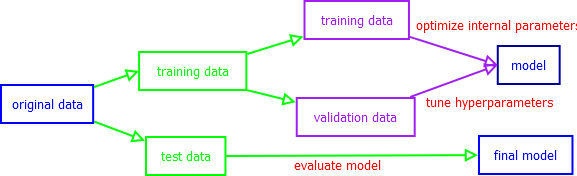

### Sklearn implementation
* In Sklearn, no direct method to split data into three parts
    1. a training set
    2. a validation set
    3. a test set. 
* A solution is to apply `train_test_split` twice  
    1. split data into two parts: a training data set and a test data set 
    2. split training data further into two parts:  training and validation data sets

### Example 2: Holdout Method for Tuning Hyperparameter 
* Dataset: Diabetes dataset (see previous lecture and lab)
* Classifier: decision tree
* Model selection
    * uses one criterion: accuracy of a classifier
    * the same model (decision tree) with different values of maximal depth of tree (hyperparameter)
* Split data into three parts:   training, validation, and test datasets
* The range of tree depth is [1,15]

In [ ]:
#split data into training and test data (80% versus 20%)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) 
#further split traning data into training and validation data (90% versus 10%)
X_train_new, X_val, y_train_new, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=4)
#set range of max_depth
max_depth_range = range(1, 16) 

In [ ]:
#creat two lists which record results
val_results = []
train_results = []

In [ ]:
#calculate the accuracy of decision tree model with max_depth in [1,15] 
for k in max_depth_range:
    clf_2 = DecisionTreeClassifier(max_depth=k)
    clf_2 = clf_2.fit(X_train_new, y_train_new)
    #accuracy on training
    pred_train_new = clf_2.predict(X_train_new)
    train_score = metrics.accuracy_score(y_train_new, pred_train_new) 
    train_results.append(train_score)
    #accuracy on validation data
    pred_val = clf_2.predict(X_val) 
    val_score = metrics.accuracy_score(y_val, pred_val) 
    val_results.append(val_score)

In [ ]:
#plot the score curves on both validation and test datasets
plt.plot(max_depth_range, val_results, 'g-', label='Val score')
plt.plot(max_depth_range, train_results, 'r-', label='Train score')
plt.ylabel('Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.grid(True)
plt.show()

### Model Selection
* Since the tree with max_depth = 2 has the highest score on validation data, it will be selected as the final model
* For big data, validation data may cover many records similar to test data. Holdout method may work well
* For small data, validation data may not cover few records similar to test data. Holdout method may not work well

### Model Evaluation
* Evaluate the model on test data

In [ ]:
clf_best1 = DecisionTreeClassifier(max_depth=2)
clf_best1 = clf_best1.fit(X_train, y_train)
y_pred = clf_best1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

### k-fold cross-validation
* In k-fold cross-validation, randomly split the training dataset into k folds without replacement
    * k −1 folds are used for training
    * 1 fold is used for validation
* This procedure is repeated k times so that we obtain k models and performance estimates.
* Advantage:
    * Each sample point will be part of a training and test dataset exactly once

    
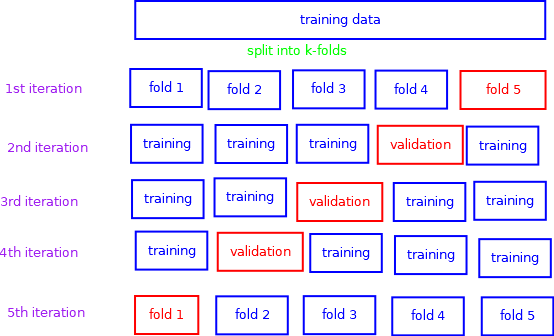

### How Many Folds?
* The more folders, the more computation time 
* Very large data sets: 3-fold cross validation is good choice
* Very small data sets: use leave-one-out is good choice
* Common choice
    * Many researchers use k=10 as this seems to be good choice for many data


### Example 3: Plot Validation Curves
* Dataset: Diabetes dataset (see previous lecture and lab)
* Classifier: decision tree
* Split data into two parts: a training set  and a test set.
* Traning data uses 5-fold cross-validation
* The range of tree depth is [1,15]

In [ ]:
#split data into training and test data (80% versus 20%)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) 
# create a decision tree
clf_22 = DecisionTreeClassifier(criterion='entropy')

### cross_val_score
* The simplest way to use cross-validation is to call the cross_val_score function which returns the score of the classifier on each fold
* The following example demonstrates how to estimate the accuracy of decisin tree by splitting the training data, fitting a model and computing the score on folds 

In [ ]:
scores = cross_val_score(clf_22, X_train, y_train, cv=10,scoring="accuracy")
print("accuracy on validation data", scores)
print("mean", np.mean(scores))

### validation_curve
* `sklearn.model_selection.validation_curve`:  determine training and test scores for varying parameter values.  
* Define a function which plot score curves on both training and test data
* Test data actually is validation data because training data is split into 10-folds for cross-validation
* For each tree depth k, we generate 10 models. Thus we use the mean accuracy to evaluate the performance of the decision tree at tree depth = k

In [ ]:
def plot_validation_curve(clf, X, y, param_name, param_range):
    train_scores, test_scores = validation_curve(clf, X, y,
                                                 cv=10, 
                                                 scoring="accuracy",  
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 n_jobs=-1)
    plt.figure(figsize=(6,4))
    x_range = param_range 
    train_scores_mean =  np.mean(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    plt.plot(x_range, train_scores_mean, 'g-', label='Training score')
    plt.plot(x_range, test_scores_mean, 'b-', label='Validation score')
    plt.ylabel('Score')
    plt.xlabel('Model complexity: tree depth')
    plt.text(6, 0.8, 'Overfitting',fontsize=12,color="r")
    plt.text(1, 0.8, 'Underfitting',fontsize=12,color="r")
    plt.axvline(4, ls='--') 
    plt.legend()
    plt.grid(True)
    plt.show()

### Model Selection
* Plot both training score curve and validation curve
* The model with max_depth =4 will be selected

In [ ]:
plot_validation_curve(clf_22, X_train, y_train, param_name='max_depth', param_range=range(1,16))

### Model Evaluation
* Evaluate the model on test data

In [ ]:
clf_best2 = DecisionTreeClassifier(max_depth=4)
clf_best2 = clf_best2.fit(X_train, y_train)
y_pred = clf_best2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

### Disadvantages in Manual Tuning
* Tune one hyperparameter at each time but a model may have many hyperparameters
* Find the optimal value manually through observing a plotting

## Part 3 Automatic Tuning of Hyperparameters
### Automatic Tuning of hyperparameters: Search
* Finding an optimal hyperparameter is a search problem
    * For each different combination of hyperparameters, evalaute the performance of the model and then choose the best one
* Sklearn provides two methods, called grid search, to automaically tune hyperparamters
    1. `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter
        * apply a brute-force exhaustive search to different combinations of hyper-parameters   
        * evaluates the model performance for each combination 
    2. `RandomizedSearchCV` implements a randomized search over parameters
        * apply randomized search to different combinations of hyper-parameters  
        * each setting is sampled from a distribution over possible combinations (but not exhaustively) 
* Grid search is based on k-fold cross-evaluation

### Example 4: GridSearchCV (brute-force exhaustive search )
* Dataset: Diabetes dataset (see previous lecture and lab)
* Classifier: decision tree
* Hyperparameters
    * criterion:  this parameter is to measure the quality of a split. There are two options
        * `gini` for the Gini impurity
        * `entropy` for the information gain
    * `max_depth`:  set its range  [1,15]
    * Total $2 \times 15 = 30$ combinations


In [ ]:
#split data into training and test data (80% versus 20%)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) 

In [ ]:
from sklearn.model_selection import GridSearchCV
# create Decision Tree classifer object
clf_31 = DecisionTreeClassifier() 
param_grid = [{'criterion':['gini'], 'max_depth':list(range(1,16))},
               {'criterion':['entropy'], 'max_depth':list(range(1,16))}]
# create a grid search object 
gs = GridSearchCV(clf_31, param_grid, scoring='accuracy', cv=10)                          
# fit model using grid search
gs = gs.fit(X_train,y_train)
 
#set the clf to the best combination of parameters
clf_best3 = gs.best_estimator_
print("best model:", clf_best3.get_params())
# Fit the best model to the data. 
clf_best3 = clf_best3.fit(X_train, y_train)

y_pred = clf_best3.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


### Example 5: RandomizedSearchCV (Randomized Search) 
* Dataset: Diabetes dataset (see previous lecture and lab)
* Classifier: decision tree
* Hyperparameters
    * criterion:  this parameter is to measure the quality of a split. There are two options
        * gini for the Gini impurity
        * entropy for the information gain
    * max_depth:  set its range  [1,15]
    * Total $2 \times 15 = 30$ combinations

In [ ]:
#split data into training and test data (80% versus 20%)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# create Decision Tree classifer object
clf_32 = DecisionTreeClassifier() 
param_grid = [{'criterion':['gini'], 'max_depth':list(range(1,16))},
               {'criterion':['entropy'], 'max_depth':list(range(1,16))}]

gs = RandomizedSearchCV(clf_32, param_grid, scoring='accuracy', cv=10)                          
# create a grid search objective
gs = gs.fit(X_train,y_train)

#set the clf to the best combination of parameters
clf_best4 = gs.best_estimator_
print("best model:", clf_best4.get_params())
# Fit the best model to the data. 
clf_best4 = clf_best4.fit(X_train, y_train)

y_pred = clf_best4.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

## Summary
* Model selection is to select the final model from potential candidate models based on their performance on the training dataset
* Overfitting means that a model fits training data very well but does not fit test data very well. Overfitting often happens in a complex model
* Tuning hyper-parameters may significantly improve the performance of a machine learning model and avoid overfitting
* Manual tuning of  hyperparameters can be implemented through the holdout method or k-fold cross-evaluation
* Automatic Tuning of hyperparameters can be implemented through grid search

### Rerefrence 
1. Sklearn 3.1. Cross-validation: evaluating estimator performance: https://scikit-learn.org/stable/modules/cross_validation.html
2. Sklearn 3.2. Tuning the hyper-parameters of an estimator https://scikit-learn.org/stable/modules/grid_search.html   